In [44]:
import openturns as ot
from dependence import ConservativeEstimate, quantile_func
from dependence.tests import func_sum
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
dim = 2
margins = [ot.Gamma(3., 1., 0., ot.Gamma.MUSIGMA)]*dim
families = np.zeros((dim, dim))
families[1, 0] = 1

test_func = func_sum

q_estimate = ConservativeEstimate(test_func, margins, families)


K = 50
n = 10000
results = q_estimate.gridsearch_minimize(K, n, q_func=q_func)

In [64]:
alpha = 0.9

if alpha > 0.5: # Maximizing the quantile
    def q_func(x, axis=1):
        return - quantile_func(alpha)(x, axis=axis)
else: # Minimizing
    q_func = quantile_func(alpha)
results.q_func = q_func
params = results.dep_params
quantities = results.quantities

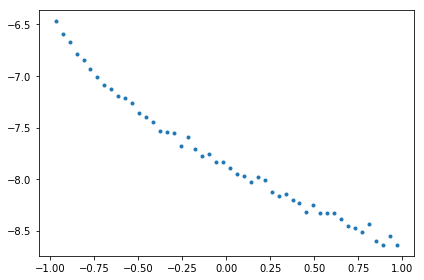

In [65]:
fig, ax = plt.subplots()
ax.plot(params, quantities, '.')

fig.tight_layout()